# Decision Trees y Random Forest con Python y scikit-learn

En el campo del **aprendizaje automático**, los **árboles de decisión (Decision Trees)** y los **bosques aleatorios (Random Forest)** son dos de las herramientas más comunes y poderosas utilizadas para la **clasificación** y la **predicción**. En este artículo, exploraremos **qué son exactamente estos modelos, cómo funcionan** y cómo podemos **implementarlos en nuestro propio proyecto individual** utilizando **Scikit-Learn**, una **biblioteca de aprendizaje automático de código abierto en Python**.

Antes de adentrarnos en los detalles de la construcción y entrenamiento de modelos de árboles de decisión y bosques aleatorios con Scikit-Learn, es necesario tener conocimientos previos:

- [Conocimiento de matemáticas para la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-a-Funciones-Matematicas-para-Data-Science-e-Inteligencia-Artificial-f9a47b52-0308-4e95-a3d3-c3de3ef7b14f)

- Conocimiento de visualización de datos con [Matplotlib](https://matplotlib.org/stable/users/index.html) y [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).

- [Conocimiento de análisis exploratorio de datos.](https://deepnote.com/@mazzaroli/Analisis-exploratorio-de-datos-caba7762-e435-481e-9060-523263a820b1)

- Conocimiento de de regresión [lineal](https://deepnote.com/@mazzaroli/Regresion-Lineal-con-Python-y-scikit-learn-86f7bb72-770c-4e28-9e84-0355aed93892) y [logística](https://deepnote.com/@mazzaroli/Regresion-Logistica-con-Python-y-scikit-learn-cd6b9628-59c3-4496-8abc-8beb77d9b4ff).


## ¿Qué son los árboles de decisión?

Los [**árboles de decisión**](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) son un **modelo de aprendizaje automático supervisado** que se utiliza tanto para la **clasificación como para la regresión.** Son ampliamente extendidos debido a su **simplicidad, facilidad de interpretación y versatilidad** en diversas aplicaciones.

Los árboles de decisión aprenden de los datos generando **reglas de tipo if-else y divisiones conocidas como nodos.** Cada nodo representa una **pregunta sobre los datos** y cada rama del árbol representa una **respuesta a esa pregunta**. El proceso continúa hasta que se llega a una **hoja del árbol, que representa la predicción final.**

Existen varios **algoritmos** que pueden utilizarse para construir árboles de decisión, como **ID3, C4.5** y **CART**. Las primeras versiones de los árboles de decisión fueron propuestas por **[Leo Breiman](https://es.wikipedia.org/wiki/Leo_Breiman)** en la década de 1980.

Los árboles de decisión se utilizan comúnmente en **tareas de clasificación**, como la **detección de spam en el correo electrónico** o la **clasificación de clientes en grupos de segmentación de mercado**. También se utilizan en **tareas de regresión**, como la **predicción de precios de bienes raíces**.

#### Ejemplo

Supongamos que queremos decidir si comprar o no un coche usado. El árbol de decisión podría ser el siguiente:

- *¿El coche tiene menos de 5 años?*
    - **Sí:** ¿El coche tiene menos de 50,000 km?
        - **Sí:** Comprar el coche.
        - **No:** No comprar el coche.
    - **No:** ¿El coche tiene menos de 80,000 km?
        - **Sí:** Comprar el coche.
        - **No:** No comprar el coche.
        
Este árbol tiene dos nodos, con **cada nodo representando una pregunta** y **cada rama representando una posible respuesta**. En función de las respuestas a las preguntas, se llega a una hoja que indica si se debe comprar o no el coche usado.

## Tu primer árbol de decisión con scikit-learn
Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [145]:
# Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook')

In [146]:
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv', sep=',')

### Análisis de datos para tu primer árbol de decisión

#### Atributos

El conjunto de datos Titanic de CS109 contiene 887 filas y 8 columnas.

1. **Survived (Sobrevivió):** indica si el pasajero sobrevivió al hundimiento del Titanic (0 = No, 1 = Sí).

1. **Pclass (Clase de pasajero):** indica la clase del pasajero (1 = 1ª clase, 2 = 2ª clase, 3 = 3ª clase).

1. **Name (Nombre):** el nombre completo del pasajero.

1. **Sex (Género):** el género del pasajero (Masculino o Femenino).

1. **Age (Edad):** la edad del pasajero en años.

1. **Siblings/Spouses Aboard (Hermanos/Cónyuges a bordo):** el número de hermanos/cónyuges del pasajero que también estaban a bordo del Titanic.

1. **Parents/Children Aboard (Padres/Hijos a bordo):** el número de padres/hijos del pasajero que también estaban a bordo del Titanic.

1. **Fare (Tarifa):** la tarifa pagada por el pasajero por su viaje en el Titanic.

In [147]:
# Visualizacion del Dataframe
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


Se eliminará la columna **"Fare"** ya que esta información está altamente correlacionada con la columna **"Pclass"** que nos indica la lase social del pasajero. Además, se eliminará la columna "Name" ya que no es relevante para el análisis que se realizará.

> ⚠\
> **Antes de eliminar cualquier columna** de un conjunto de datos, **es importante tener una comprensión completa de los datos** y el objetivo del análisis. Además, siempre **es recomendable consultar con otros expertos o interesados** en los datos para asegurarse **de que no se está eliminando información importante** o relevante.\
> ⚠
>
> las columnas **"Fare"** y **"Name"** en el dataset Titanic de CS109 **contienen información importante.** La columna "Fare" representa el precio del billete pagado por cada pasajero, lo que puede ser útil para analizar la relación entre la tarifa y la clase de pasajero. Por otro lado, la columna "Name" contiene información sobre el nombre de cada pasajero, que podría ser útil para el análisis de patrones de nombres o la búsqueda de información adicional sobre individuos específicos. Sin embargo, **en el contexto de un análisis específico de la supervivencia de los pasajeros en el Titanic, estas columnas pueden no ser relevantes** y por lo tanto podrían ser eliminadas para simplificar el conjunto de datos.

In [148]:
# Eliminamos las columnas que no nos interesan
titanic.drop(
    ['Name', 'Fare'], 
    axis=1,
    inplace=True)

In [149]:
# Renombramos las columnas Siblings/Spouses Aboard	y Parents/Children Aboard por SibSp y ParCh 
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [150]:
# Analizamos el shape del objeto
titanic.shape

(887, 6)

In [151]:
# Visualizamos los tipos de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB


In [152]:
# Cambiamos los tipos de datos de Sex
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

In [153]:
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
ParCh         int64
Sex_male      uint8
dtype: object

In [154]:
titanic.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [155]:
# Renombramos columna Sex_male a Sex
titanic.rename(columns={'Sex_male':'Sex'},inplace=True)

- Sex = 1 = Male
- Sex = 0 = Female

In [156]:
# Ordenar colummas por nombres
titanic = titanic[['Survived','Pclass','Sex','Age','SibSp','ParCh']]
titanic

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
882,0,2,1,27.0,0,0
883,1,1,0,19.0,0,0
884,0,3,0,7.0,1,2
885,1,1,1,26.0,0,0


### Entrenamiento de árbol de decisión con scikit-learn

In [157]:
# Vemos la proporcion del a variable objetivo
titanic.Survived.value_counts(normalize=True)

0    0.614431
1    0.385569
Name: Survived, dtype: float64

In [158]:
# importamos libreria para balancear los datos
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [159]:
# Separamos en X e y
X_titanic = titanic.drop('Survived', axis=1)
y_titanic = titanic.Survived

In [160]:
# Balanceamos los datos
X_over_titanic, y_over_titanic  = undersample.fit_resample(X_titanic,y_titanic)
y_over_titanic.value_counts(normalize=True)


0    0.5
1    0.5
Name: Survived, dtype: float64

In [161]:
# Importamos las librerias para dividir el dataset
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_over_titanic,y_over_titanic, test_size=0.30, random_state=42)

In [162]:
# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_titanic, y_train_titanic)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.7908687943262411


In [163]:
# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

In [164]:
# Predecimos Y
y_train_pred_titanic = best_clf.predict(X_train_titanic)
y_test_pred_titanic = best_clf.predict(X_test_titanic)

### Evaluacion del modelo

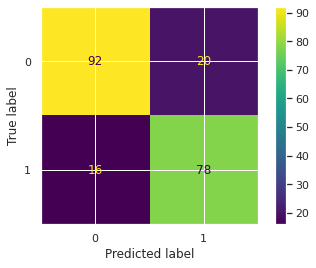

In [165]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test_titanic,y_test_pred_titanic,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

In [166]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train_titanic)
y_test_pred = best_clf.predict(X_test_titanic)

In [167]:
from sklearn.metrics import accuracy_score
print('El accuracy en train es:',accuracy_score(y_train_titanic,y_train_pred_titanic))
print('El accuracy en test es:', accuracy_score(y_test_titanic,y_test_pred_titanic))


El accuracy en train es: 0.8179916317991632
El accuracy en test es: 0.8252427184466019


In [168]:
feature_scores_titanic = pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train_titanic.columns).sort_values(ascending=False)).T

/home/mazzaroli/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


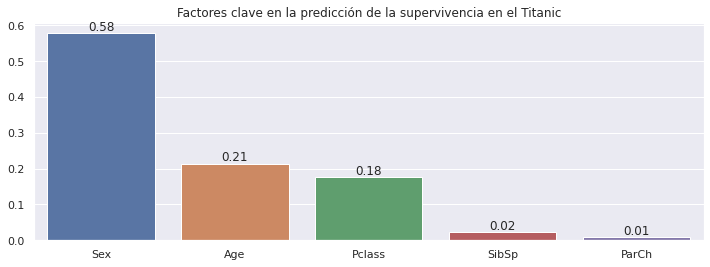

In [169]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores_titanic)

for index, value in enumerate(feature_scores_titanic.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la supervivencia en el Titanic")
plt.show()

- Podemos observar que para la clasificación del modelo en base a la variable target: **Survived**, los **features más importantes** son: **Sex**, seguido de **Age** y luego de **Pclass**. 
 
- **SibSp** y **ParCh no tienen un impacto significativo** en la capacidad del modelo para predecir la variable objetivo, **se podrían eliminar sin afectar la capacidad de predicción**.

- Es importante destacar que se observa una performance parecida en la métrica de **Accuracy** para los datos de **Train** y de **Test**, lo cual es claramente positivo para nuestro modelo. 

## ¿Cómo funcionan los árboles de decisión?

Los árboles de decisión son un tipo de **modelo de aprendizaje supervisado** que se utilizan para **clasificar o predecir valores numéricos**. En resumen, los árboles de decisión toman un conjunto de datos de entrada, lo dividen en subconjuntos basados en diferentes atributos y, finalmente, hacen una predicción sobre el valor de salida.

Por ejemplo, considera el siguiente conjunto de datos que describe varios productos que se venden en una tienda en línea:

|Producto|Precio|	Descuento|	En Oferta|
|--------|------|----------|-----------|
|A	      |10	 |0.05	   |Sí         |
|B	      |20	 |0.10	   |No         |
|C	      |30	 |0.20	   |Sí         |
|D	      |15	 |0.15	   |Sí         |
|E	      |25	 |0.10	   |No         |

En este caso, queremos construir un árbol de decisión que nos permita **predecir si un producto estará en oferta o no, en función de sus características.**

Comenzamos por construir el **nodo raíz**, que representa el conjunto completo de datos. A continuación, seleccionamos un atributo para dividir el conjunto de datos. En este caso, podríamos elegir el atributo **"Precio"** como nuestra primera división.

Supongamos que elegimos un umbral de $20 para el precio, lo que significa que cualquier producto con un precio mayor a $20 se considerará "caro" y cualquier producto con un precio menor o igual a $20 se considerará "barato". La primera división del árbol quedaría así:

```java
                     Precio <= 20
                    /            \
         Sí (Producto Barato)  No (Producto Caro) 
```
El árbol de decisión tiene dos ramas: una rama para los productos baratos y otra para los productos caros. La rama para los productos baratos conduce a un **nodo de hoja** que indica que el producto A está en oferta. La rama para los productos caros conduce a otro **nodo de decisión**, que utiliza el descuento para decidir si el producto está en oferta o no.

Supongamos que elegimos un umbral de descuento del 15%. Entonces, el árbol de decisión completo quedaría así:

```java
                     Precio <= 20
                    /            \
         Sí (Producto Barato)  No (Producto Caro) 
                  /                       \
      (Descuento <= 3%)              (Descuento <= 15%)
      /            \                  /                \
Sí (Sin oferta)  No (En oferta)    Sí (Sin oferta)  No (En oferta)
```
Este árbol nos permite **predecir si un producto está en oferta o no en función de su precio y su descuento.**

<img src='https://blog.mindmanager.com/wp-content/uploads/2022/03/Decision-Tree-Diagram-Example-MindManager-Blog.png' width=500>

### Terminología de los árboles de decisión

Aquí está la terminología comúnmente utilizada en los árboles de decisión:

- **Nodo raíz:** Es el primer nodo del árbol de decisión y no tiene un nodo padre. Representa el conjunto de datos completo y es el punto de partida para la construcción del árbol.

- **División:** Es la separación de un conjunto de datos en subconjuntos más pequeños y homogéneos en función de un atributo determinado. Cada división genera un nuevo nodo y una nueva rama en el árbol.

- **Nodo de decisión:** Es un nodo interno del árbol que representa una característica del conjunto de datos y tiene al menos dos ramas que indican las posibles opciones para esa característica.

- **Nodo de hoja:** Es un nodo terminal del árbol que no tiene más ramas y representa una etiqueta de clase o una predicción para el conjunto de datos de entrada.

- **Poda (pruning):** Es un proceso de eliminación de nodos innecesarios del árbol para evitar el sobreajuste (overfitting) del modelo y mejorar su capacidad de generalización. La poda se realiza después de construir el árbol y puede ser prepruning o postpruning.

- **Rama:** Es una conexión entre dos nodos del árbol que representa una opción posible para un atributo determinado.

- **Nodo madre/padre:** Es el nodo inmediatamente anterior a un nodo específico en el árbol. Un nodo puede tener varios nodos hijos, pero solo tiene un nodo padre.

- **Hijo:** Es un nodo inmediatamente posterior a un nodo específico en el árbol. Un nodo puede tener varios nodos hijos, pero solo tiene un nodo padre.


## ¿Cuándo usar árboles de decisión?

### Ventajas

- **Algoritmo de caja blanca:** los árboles de decisión son considerados [algoritmos de caja blanca](https://es.wikipedia.org/wiki/Caja_blanca_(sistemas)), lo que significa que son modelos fácilmente interpretables y comprensibles por los humanos.

- **Resultados fáciles de interpretar y entender:** como se mencionó anteriormente, los árboles de decisión son modelos fáciles de interpretar y entender, ya que cada paso en el proceso de toma de decisiones se representa explícitamente. Esto permite que los expertos del dominio puedan validar el modelo y dar sugerencias para mejorarlo.

- **Las combinaciones de los mismos pueden dar resultados muy certeros:** los árboles de decisión individuales pueden ser limitados en términos de precisión de predicción. Sin embargo, una técnica que se utiliza para mejorar la precisión de los árboles de decisión es la combinación de varios árboles en un conjunto, como en el caso de Random Forest. Esto se conoce como ensamblaje de modelos y puede proporcionar una mayor precisión en las predicciones.

### Desventajas

- **Tendencia al sobreajuste u overfitting:** los árboles de decisión tienen una tendencia natural a sobreajustarse o overfitting, lo que significa que pueden ajustarse demasiado a los datos de entrenamiento y no generalizar bien para nuevos datos. Esto se puede prevenir mediante técnicas de **poda** o **regularización**.

- **Influencia de los outliers:** los outliers o valores atípicos pueden tener una influencia significativa en la creación de los árboles de decisión, ya que pueden sesgar la partición de los datos. Una solución a esto es utilizar técnicas de **preprocesamiento de datos** para tratar con los outliers antes de crear el árbol.

- **Arboles demasiado complejos pueden no adaptarse bien a los nuevos datos:** si se crean árboles de decisión demasiado complejos, pueden adaptarse demasiado a los datos de entrenamiento y no generalizar bien para nuevos datos. Esto se puede prevenir mediante técnicas de **poda** o **regularización** para simplificar el árbol.

- **Posibilidad de crear árboles sesgados si una clase es más numerosa:** si una clase es significativamente más numerosa que las demás clases, el árbol de decisión puede estar sesgado hacia esa clase mayoritaria y no prestar suficiente atención a las otras clases. Esto se puede prevenir mediante técnicas de **balanceo** de clases, como el **muestreo estratificado** o el **aumento de datos**.

### ¿Cuándo usar árboles de decisión?

- **Sencillo y fácil de entender:** los árboles de decisión son una técnica sencilla y fácil de interpretar. Por lo tanto, es recomendable utilizarlos cuando se busca una solución clara y fácil de entender. Además, la estructura de árbol es intuitiva y fácil de visualizar, lo que hace que el proceso de toma de decisiones sea más fácil de entender.

- **Funcionan bastante bien con grandes conjuntos de datos:** los árboles de decisión pueden funcionar muy bien con grandes conjuntos de datos. A medida que el tamaño del conjunto de datos aumenta, los árboles de decisión se vuelven más útiles, ya que pueden segmentar el conjunto de datos en grupos más pequeños y más manejables para un análisis más profundo.

- **Relativamente robusto:** los árboles de decisión son relativamente robustos y pueden manejar datos faltantes o ruidosos. Además, son útiles en situaciones en las que se necesitan resultados precisos con una alta tasa de precisión.

- **Método útil para analizar datos cuantitativos:** los árboles de decisión son particularmente útiles para analizar datos cuantitativos. Por ejemplo, en el análisis de negocios, los árboles de decisión pueden ayudar a identificar patrones en grandes conjuntos de datos y hacer recomendaciones basadas en esa información.

- **Aplicable para clasificación y regresión:** los árboles de decisión se pueden utilizar para problemas de clasificación y regresión. En problemas de clasificación, se utiliza para asignar una etiqueta a un objeto, mientras que en problemas de regresión, se utiliza para predecir una variable continua.

# Proyecto práctico: árboles de decisión

Data comes frome: [Car Evaluation Data Set](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set)

En este proyecto, exploraremos el conjunto de datos **"Car Evaluation Data Set"** y utilizaremos **árboles de decisión** para construir un **modelo de clasificación** capaz de **predecir la calidad de compra de un automóvil**.

## Conociendo nuestro dataset

El conjunto de datos "Car Evaluation Data Set" es un conjunto de datos público que consta de **1728 instancias etiquetadas con la clase de calidad de compra del automóvil**. Cada instancia tiene **6 atributos discretos: precio, mantenimiento, número de puertas, capacidad de personas, tamaño del maletero y seguridad.**

Los atributos son definidos de la siguiente manera:


- **price (Precio):** representa el costo del automóvil. Los valores posibles son 'vhigh' (muy caro), 'high' (caro), 'med' (medio) y 'low' (económico).

- **maint (Mantenimiento):** representa el costo de mantenimiento del automóvil. Los valores posibles son 'vhigh' (muy caro), 'high' (caro), 'med' (medio) y 'low' (económico).

- **doors (Número de puertas):** representa la cantidad de puertas que tiene el automóvil. Los valores posibles son '2', '3', '4' y '5more' (5 o más).

- **persons (Capacidad de personas):** representa la capacidad de personas que puede transportar el automóvil. Los valores posibles son '2', '4', 'more' (más de 4).

- **lug_boot (Tamaño del maletero):** representa el tamaño del maletero del automóvil. Los valores posibles son 'small' (pequeño), 'med' (medio) y 'big' (grande).

- **safety (Seguridad):** representa la calidad de seguridad del automóvil. Los valores posibles son 'low' (baja), 'med' (media) y 'high' (alta).

- **Class (Evaluación de la calidad de los automóviles):**. Esta variable objetivo tiene cuatro posibles valores de clasificación: "unacc" (inaceptable), "acc" (aceptable), "good" (bueno) y "vgood" (muy bueno). 

### Importar librerías

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

### Carga de datos


In [171]:
df_car = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)

columns_names = ['price','maint','doors','persons','lug_boot','safety','Class']

df_car.columns = columns_names

In [172]:
# Visualizacion del DataFrame
df_car.head()

,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [173]:
# Visualizacion del shape del DF
df_car.shape

(1728, 7)

In [174]:
# Tipos de datos
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


- Hay 7 variables en el conjunto de datos, donde todas están clasificadas como datos categóricos. 
- La variable **Class** es el objetivo del análisis.

In [175]:
# Vereificamos valores missings
df_car.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

## Data pre-processing

### Drop duplicates

No hay datos duplicados en el dataset

In [176]:
df_car.drop_duplicates()

,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Manejo de datos nulos

No hay datos nulos en el dataset

In [177]:
df_car.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

### Distribución de frecuencia y proprocion de las variables

In [178]:
# Funcion conteo y proporcion de datos
def dist(df,target):
    count= df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)

    dist = pd.DataFrame({'Freq[N]':count,'Prop[%]':prop.round(3)})
    return dist

In [179]:
# Ver el conteo y la proporción de Class 
for i in columns_names:
    print(' '*7,i.upper())
    print(dist(df_car,i))
    print("*"*23)

        PRICE
       Freq[N]  Prop[%]
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        MAINT
       Freq[N]  Prop[%]
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        DOORS
       Freq[N]  Prop[%]
2          432     0.25
3          432     0.25
4          432     0.25
5more      432     0.25
***********************
        PERSONS
      Freq[N]  Prop[%]
2         576    0.333
4         576    0.333
more      576    0.333
***********************
        LUG_BOOT
       Freq[N]  Prop[%]
small      576    0.333
med        576    0.333
big        576    0.333
***********************
        SAFETY
      Freq[N]  Prop[%]
low       576    0.333
med       576    0.333
high      576    0.333
***********************
        CLASS
       Freq[N]  Prop[%]
unacc     1210    0.700
acc        384    0.222
good        69    0.040
vgood       65  

## Análisis exploratorio de datos

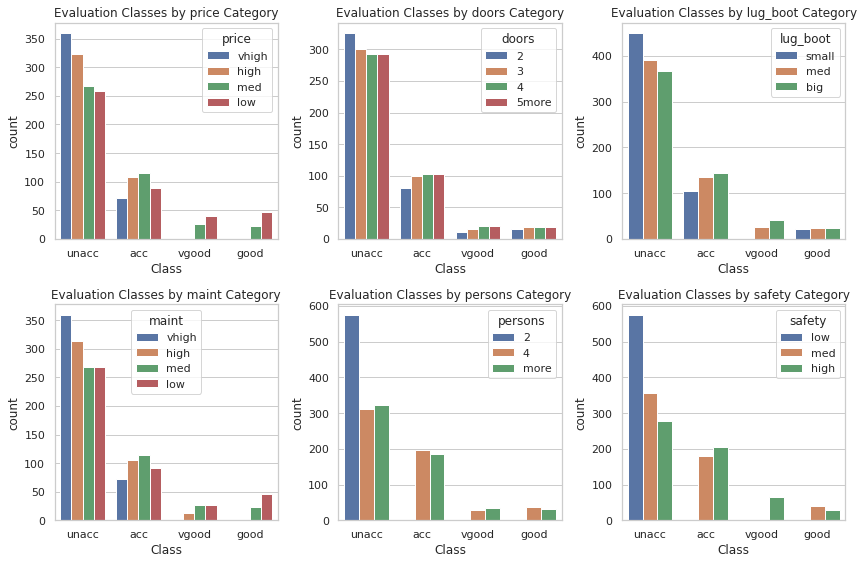

In [180]:
# Graficamos la variable Class separada por los distintos atributos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, variable in enumerate(columns_names[:-1]):
    row = i % 2
    col = i // 2
    sns.countplot(data=df_car, x='Class',hue=variable, ax=axes[row][col])
    axes[row][col].set_title(f"Evaluation Classes by {variable} Category")

plt.tight_layout()
plt.show()

#### Insight

- **Price:** Los autos con precio bajo o medio tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos de precio alto.

- **Doors:** Los autos con 4 o más puertas tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos de 3 o 2 puertas.

- **Lug_boot:** Los autos con maletero grande o mediano tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con maletero pequeño.

- **Maint:** Los autos con costos de mantenimiento bajos o medios tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con costos de mantenimiento altos.

- **Persons:** Los autos con capacidad de 4 o más personas tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con capacidad de menos de 4 personas.

- **Safety:** Los autos con alto nivel de seguridad tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con bajo o medio nivel de seguridad.

## Feature Engineering


### Undersampling

In [181]:
from imblearn.under_sampling import RandomUnderSampler

In [182]:
undersample = RandomUnderSampler(random_state=42)

### Declarando variables predictoras y variable objetivo

In [183]:
# Separamos datos por X e Y
X_car = df_car.drop('Class',axis=1)
y_car = df_car.Class

In [184]:
# Se realiza el undersampling
X_car, y_car = undersample.fit_resample(X_car,y_car)

Codificación de las variables categóricas.

In [185]:
#!pip install category_encoders 

In [186]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=columns_names[:-1])

X_car = encoder.fit_transform(X_car)

In [187]:
X_car.head()

,price,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,2,2,1,1,1
2,2,2,3,1,1,1
3,2,2,4,2,2,2
4,3,3,3,2,1,2


In [188]:
X_car.dtypes

price       int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

### Split Data - Training and Testing

In [189]:
from sklearn.model_selection import train_test_split

X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car,y_car,test_size=0.3, random_state=42)

In [190]:
print('X:',X_train_car.shape, X_test_car.shape)
print('y:',y_train_car.shape, y_test_car.shape)

X: (182, 6) (78, 6)
y: (182,) (78,)


## Entrenamiento del modelo

In [191]:
from sklearn.tree import DecisionTreeClassifier

# Instancia del modelo
tree_car = DecisionTreeClassifier(random_state=42)

### Optimización de parámetros

In [192]:
from sklearn.model_selection import GridSearchCV

# parametros del decision tree
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}


In [193]:
# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(tree_car, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_car, y_train_car)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.8026315789473685


In [194]:
# Modelo decision tree con parametros optimizados
best_tree_car = grid_search.best_estimator_

In [195]:
# Predecimos Y
y_train_pred_tree_car = best_tree_car.predict(X_train_car)
y_test_pred_tree_car = best_tree_car.predict(X_test_car)

### Evaluacion del modelo

In [196]:
from sklearn.metrics import accuracy_score, classification_report

In [197]:
# Calculo el accuract en train 
train_acc = accuracy_score(y_true=y_test_car,y_pred=y_test_pred_tree_car)
# Calculo el accuract en test 
test_acc  = accuracy_score(y_true=y_train_car,y_pred=y_train_pred_tree_car)

In [198]:
print("El accuracy en train es:",train_acc)
print("El accuracy en test es:",test_acc)

El accuracy en train es: 0.717948717948718
El accuracy en test es: 0.8131868131868132


La precisión en los conjuntos de datos de entrenamiento y prueba están muy cercanas, lo que sugiere que el modelo no está sufriendo de sobreajuste.

In [199]:
print(classification_report(y_test_car,y_test_pred_tree_car))

              precision    recall  f1-score   support

         acc       0.77      0.62      0.69        16
        good       0.65      0.48      0.55        23
       unacc       1.00      0.80      0.89        20
       vgood       0.59      1.00      0.75        19

    accuracy                           0.72        78
   macro avg       0.75      0.73      0.72        78
weighted avg       0.75      0.72      0.71        78



Podemos observar que el **f1-score de la clase 'good' es relativamente bajo**, mientras que el **f1-score de 'unacc' es alto**. Esto sugiere que el modelo tiene dificultades para clasificar correctamente las clase 'good'. Por otro lado, el **f1-score de 'acc' y 'vgood' es promedio**. 

**El f1-score promedio general es de 0.72**, lo cual indica que el modelo tiene un buen rendimiento general en la clasificación de las distintas clases.

/home/mazzaroli/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


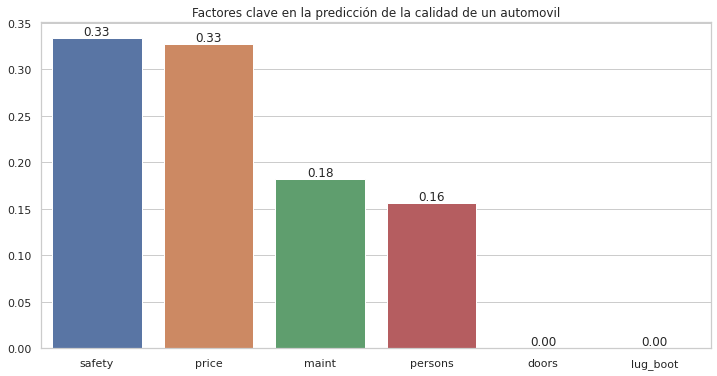

,0
safety,0.333983
price,0.327521
maint,0.182004
persons,0.156493
doors,0.000000
lug_boot,0.000000


In [200]:
feature_scores_car = pd.DataFrame(pd.Series(best_tree_car.feature_importances_, index=X_train_car.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_car)

for index, value in enumerate(feature_scores_car.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la calidad de un automovil")
plt.show()
pd.DataFrame(feature_scores_car.T)

El **precio** y el **mantenimiento** de un automóvil son factores cruciales en la determinación de su clasificación. 

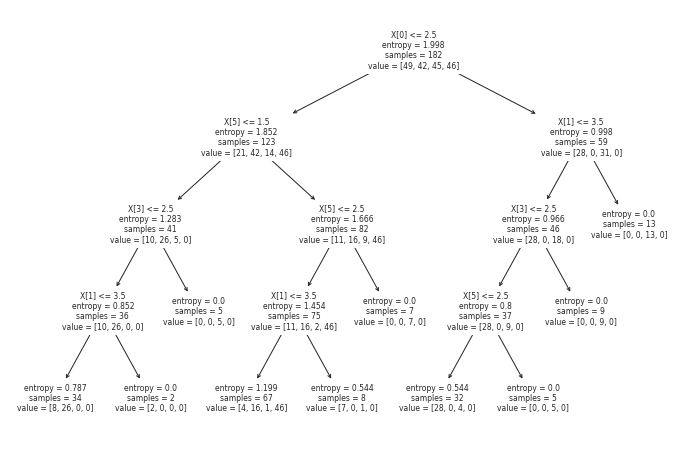

In [201]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(best_tree_car.fit(X_train_car, y_train_car));

# Introducción a random forest


## ¿Qué es un bosque aleatorio o random forest?

Random Forest es un **algoritmo de aprendizaje automático de ensamble** que combina múltiples árboles de decisión para producir una predicción más **precisa y robusta.** Es una técnica popular y poderosa en el campo del machine learning para tareas de **clasificación y regresión.**

### ¿Qué es un algoritmo de ensamble?

El término **"ensamble"** se refiere a la idea de **combinar múltiples modelos de aprendizaje para mejorar la precisión y la estabilidad.** En el caso de Random Forest, cada modelo en el ensamble es un árbol de decisión, y el conjunto completo de árboles se llama bosque.

### ¿Como se construye un bosque aleatorio?

El proceso de construcción de un bosque aleatorio comienza seleccionando una muestra aleatoria de los datos de entrenamiento para cada árbol de decisión. En cada árbol, se selecciona un **subconjunto aleatorio de características** de las muestras y se utiliza para entrenar el modelo. Esto se conoce como **"muestreo de características"** o **"bagging".**

La idea detrás del muestreo de características es **reducir la correlación entre los árboles de decisión.** Al seleccionar solo un subconjunto de características en cada árbol, se reduce la probabilidad de que los mismos predictores se utilicen en cada árbol y se mejora la capacidad del bosque para generalizar a nuevos datos.

Una vez que se han entrenado todos los árboles de decisión, se combina su salida para hacer una predicción final. En el caso de la clasificación, la predicción final es la clase que obtiene la mayoría de los votos de los árboles de decisión. En la regresión, la predicción final es el promedio de las predicciones de cada árbol.

### Problemas de overfitting


**El sobreajuste (overfitting)** es un problema común en los modelos de Random Forest, así como en otros algoritmos de aprendizaje automático. Ocurre cuando **el modelo se ajusta demasiado a los datos de entrenamiento y captura patrones específicos de ese conjunto de datos en lugar de generalizar para nuevos datos.**

El Random Forest puede ser propenso al sobreajuste debido a la **alta complejidad del modelo.** Al construir múltiples árboles de decisión en paralelo y combinar sus predicciones, **el Random Forest tiene una capacidad inherente para adaptarse y capturar los detalles más finos en los datos de entrenamiento.**

Cuando el modelo se sobreajusta, puede resultar en un **rendimiento deficiente en datos no vistos**, como el conjunto de prueba o nuevos datos en producción. El modelo **se vuelve demasiado sensible a las peculiaridades y el ruido del conjunto de entrenamiento**, lo que dificulta su capacidad para **generalizar correctamente**.

Para mitigar el sobreajuste en Random Forest, se pueden utilizar diversas estrategias, como:


- **Regularización:** Ajustar los parámetros de regularización del modelo, como el número máximo de características consideradas en cada división del árbol o el número mínimo de muestras requeridas para crear un nodo.

- **Validación cruzada:** Utilizar técnicas de validación cruzada para evaluar el rendimiento del modelo en diferentes conjuntos de entrenamiento y prueba. Esto ayuda a detectar si el modelo está sobreajustado y permite ajustar los parámetros en consecuencia.

- **Reducción de características:** Eliminar características irrelevantes o redundantes del conjunto de datos para reducir la complejidad y evitar el sobreajuste.

- **Aumento de datos:** Generar datos sintéticos o aumentar la cantidad de datos de entrenamiento mediante técnicas como la interpolación o la rotación, lo que puede ayudar a mejorar la generalización del modelo.

## ¿Cuándo utilizar random forest?

### Ventajas

- **Funciona bien incluso sin ajuste de hiperparámetros:** A diferencia de otros algoritmos, un Random Forest suele ofrecer buenos resultados incluso con los valores predeterminados de hiperparámetros. Esto significa que no siempre es necesario ajustarlos de forma exhaustiva para obtener un modelo decente.

- **Reduce el riesgo de sobreajuste (overfitting):** Al combinar múltiples árboles de decisión, el Random Forest disminuye la probabilidad de sobreajustar el modelo a los datos de entrenamiento, mejorando así su capacidad de generalización.

- **Estabilidad frente a nuevas muestras de datos:**  El modelo del Random Forest tiende a ser estable y mantiene un buen rendimiento al enfrentar nuevos conjuntos de datos. La combinación de predicciones de varios árboles reduce el impacto de datos atípicos y ruido, lo que lo hace robusto frente a la variación de los datos de entrada.

### Desventajas

- **Es más costoso en términos de creación y ejecución que un solo árbol de decisión:** Un Random Forest está compuesto por múltiples árboles de decisión, lo que implica un mayor costo computacional tanto en tiempo de entrenamiento como en memoria requerida durante la ejecución. En comparación con un solo árbol de decisión, el Random Forest puede ser más exigente en recursos.

- **No funciona bien con conjuntos de datos pequeños:** El Random Forest requiere una cantidad suficiente de datos para obtener resultados confiables. En conjuntos de datos pequeños, hay un mayor riesgo de sobreajuste o de no aprovechar completamente la capacidad de generalización del algoritmo.

- **Puede requerir mucho tiempo de entrenamiento:** Debido a que el Random Forest se compone de múltiples árboles de decisión, el proceso de entrenamiento puede llevar más tiempo en comparación con un solo árbol de decisión. Cada árbol se entrena de forma independiente, lo que puede resultar en un tiempo total de entrenamiento prolongado, especialmente si se utilizan conjuntos de datos grandes o se requiere una alta precisión.

- **La interpretación a veces se vuelve compleja:** A medida que aumenta el número de árboles en el bosque, la interpretación del modelo se vuelve más desafiante. Determinar la importancia de las características o entender las relaciones entre las variables puede requerir técnicas adicionales y análisis más profundos.

## ¿Cuándo usar random forest?


- **Rápido y fácil de aplicar:** Es relativamente fácil de implementar y utilizar. Como con scikit-learn en Python, es rápido de aplicar en diferentes conjuntos de datos sin requerir una configuración exhaustiva.

- **Técnicas de hyperparameter tuning:** El Random Forest se beneficia de la aplicación de técnicas de ajuste de hiperparámetros, como grid search o búsqueda aleatoria, para encontrar la mejor combinación de configuraciones del modelo.

- **Problemas de clasificación y regresión:** El Random Forest es adecuado tanto para problemas de clasificación como de regresión. Puede manejar múltiples clases en problemas de clasificación y proporcionar predicciones numéricas en problemas de regresión.

- **Conjuntos de datos grandes:** El Random Forest es especialmente efectivo cuando se trabaja con conjuntos de datos grandes. Con más datos disponibles, los árboles individuales del Random Forest pueden aprender patrones más complejos y realizar predicciones más precisas.

## Tu primer random forest con scikit-learn

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

### Conociendo nuestro dataset

El conjunto de datos contiene información médica de mujeres Pima Indian de Arizona, Estados Unidos, que participaron en un estudio de la diabetes en la década de 1980.

El conjunto de datos consta de **768 instancias** y **9 atributos**, incluyendo el número de veces que una mujer ha estado embarazada, su edad, presión arterial diastólica, índice de masa corporal, concentración de glucosa en plasma y la presencia o ausencia de diabetes en la prueba.

### Atributos

1. **preg**: Número de veces embarazada
1. **plas**: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
1. **pres**: Presión arterial diastólica (mm Hg)
1. **skin**: Grosor del pliegue cutáneo tricipital (mm)
1. **test**: Concentración de insulina en suero a las 2 horas (mu U/ml)
1. **mass**: Índice de masa corporal (peso en kg/(altura en m)^2)
1. **pedi**: Función de diabetes basada en antecedentes familiares
1. **age**: Edad (años)
1. **class**: Variable de clase (1: positivo para diabetes, 0: negativo para diabetes en la prueba)

### Importar librerías

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

### Carga de datos

In [203]:
df_diabetes = pd.read_csv('pima-indians-diabetes.csv', header=None, sep=',')

df_columns = np.array(['preg','plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'Class'])

df_diabetes.columns = df_columns

In [204]:
# Visualizacion del DataFrame
df_diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [205]:
# Visualizacion del shape del DF
df_diabetes.shape

(768, 9)

In [206]:
# Tipos de datos
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   Class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todos los datos son de tipo numerico

### Data pre-processing
#### Drop duplicates

In [207]:
# No hay datos duplicados en el dataset
df_diabetes.drop_duplicates(inplace=True)
df_diabetes

,preg,plas,pres,skin,test,mass,pedi,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### EDA

#### Manejo de datos nulos

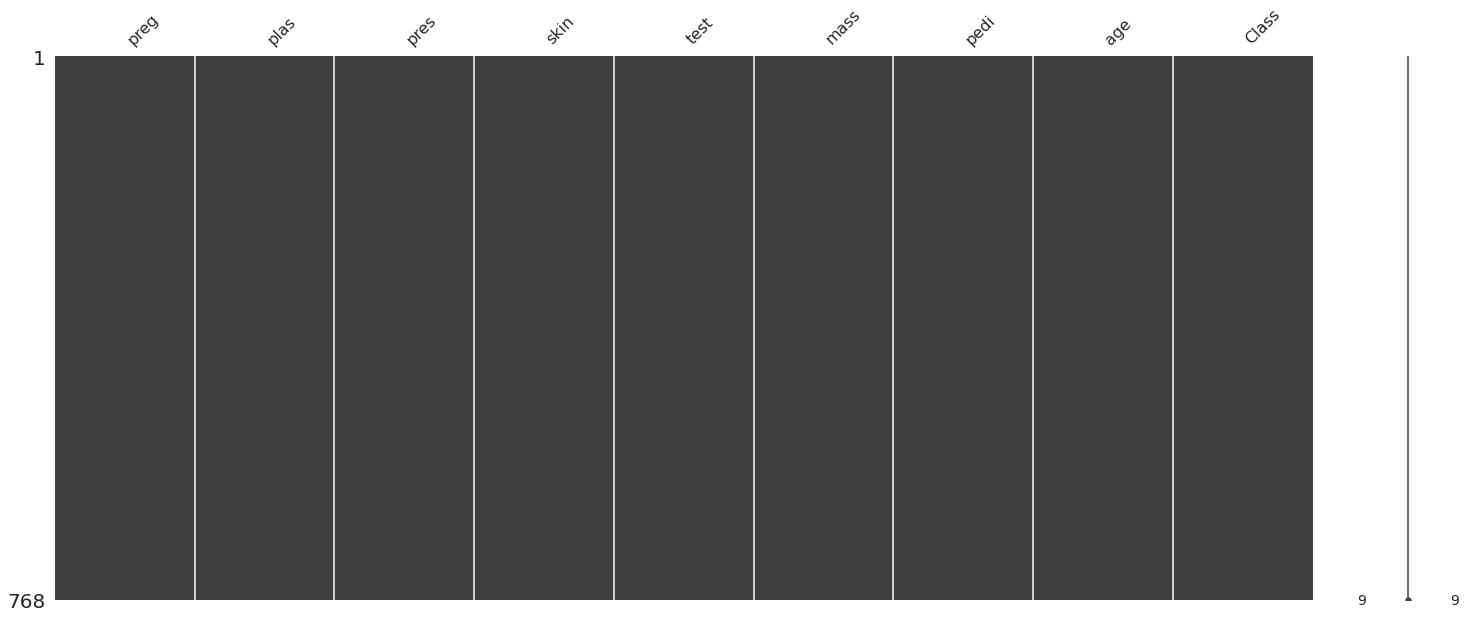

In [208]:
import missingno as miss

miss.matrix(df_diabetes);

No hay datos nulos

#### Variables con datos perdidos

In [209]:
df_diabetes.iloc[:, 1:6].replace(to_replace=[0], value=np.nan).isna().sum().reset_index(name = 'missing_values').rename(columns={"index": "variable"}).assign( percentage = lambda df_reset: df_reset.missing_values / len(df_diabetes) * 100)

,variable,missing_values,percentage
0,plas,5,0.651042
1,pres,35,4.557292
2,skin,227,29.557292
3,test,374,48.697917
4,mass,11,1.432292


#### Proporcion de la variable objetivo

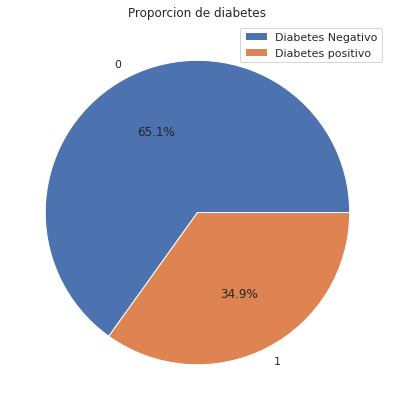

0    500
1    268
Name: Class, dtype: int64


In [210]:
plt.figure(figsize=(7,7))

labels, counts = np.unique(df_diabetes.Class, return_counts=True)
plt.pie(counts, autopct='%1.1f%%',labels=labels)
plt.legend({'Diabetes Negativo','Diabetes positivo'})
plt.title('Proporcion de diabetes')

plt.show()

print(df_diabetes.Class.value_counts())

### Entrenamiento de random forest con scikit-learn

In [211]:
# Separamos en X e Y
X_diabetes = df_diabetes.drop('Class',axis=1)
y_diabetes = df_diabetes.Class

In [212]:
# Importamos las librerias para entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes,y_diabetes, test_size=.20, random_state=42)

In [213]:
X_train_diabetes.shape,y_train_diabetes.shape

((614, 8), (614,))

In [214]:
# Bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

# Instancia del modelo
rfc_diabetes = RandomForestClassifier(random_state=42)

In [215]:
# Optimizacion de parametros
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'n_estimators': [10,25,50],
    'max_depth' : [5,10,15],
    'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,4],
}

In [216]:
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rfc_diabetes, param_grid=param_grid, cv=5, scoring='accuracy')

In [217]:
# Ajustar el modelo con GridSearchCV
grid_search.fit(X_train_diabetes, y_train_diabetes)

# Obtener el modelo con el mejor rendimiento
best_model_diabetes = grid_search.best_estimator_

/home/mazzaroli/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mazzaroli/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mazzaroli/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/home/mazzaroli/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  Fil

In [218]:
# Mejores parametros del modelo
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [219]:
from sklearn.metrics import accuracy_score, classification_report
y_train_pred_diabetes = best_model_diabetes.predict(X_train_diabetes)
y_test_pred_diabetes = best_model_diabetes.predict(X_test_diabetes)

accuracy_train_diabetes = accuracy_score(y_train_diabetes,y_train_pred_diabetes)
accuracy_test_diabetes = accuracy_score(y_test_diabetes,y_test_pred_diabetes)

In [220]:
print(accuracy_train_diabetes)
print(accuracy_test_diabetes)

0.8501628664495114
0.7857142857142857


In [221]:
print(classification_report(y_test_diabetes, y_test_pred_diabetes))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



El modelo de Random Forest, con parámetros optimizados, alcanzó una **precisión general** del **79%** y un **promedio ponderado** del **76%**. 

El F1-score para la **clase "0"** fue de **84%**, indicando una buena capacidad para identificar casos negativos. Sin embargo, el F1-score para la **clase "1"** fue de **68%**, mostrando un rendimiento ligeramente inferior en la detección de casos positivos. 

En general, el modelo demostró un rendimiento satisfactorio.

### Análisis de las importancias de los features

/home/mazzaroli/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


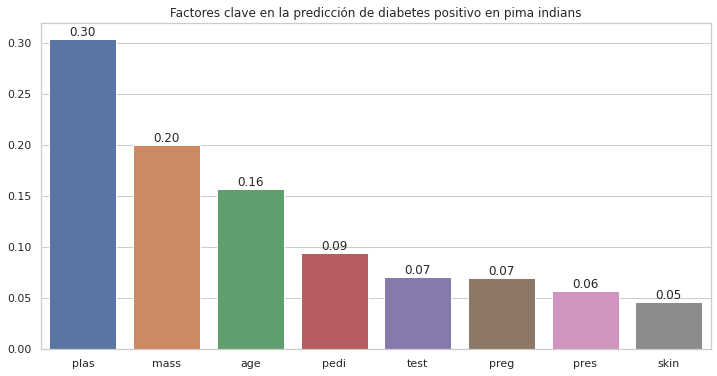

,0
plas,0.304330
mass,0.200533
age,0.157357
pedi,0.093927
test,0.070988
preg,0.069711
pres,0.057222
skin,0.045934


In [222]:
feature_scores_diabetes = pd.DataFrame(pd.Series(best_model_diabetes.feature_importances_, index=X_train_diabetes.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_diabetes)

for index, value in enumerate(feature_scores_diabetes.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de diabetes positivo en pima indians")
plt.show()
pd.DataFrame(feature_scores_diabetes).T


Un análisis de las importancias de las características revela que las características más influyentes para la predicción del modelo son:

- **plas:** Con una importancia de 0.304330, se destaca como la característica más importante. Esto indica que la concentración de glucosa en plasma sanguíneo tiene un impacto significativo en la predicción de la diabetes.

- **mass:** El índice de masa corporal (IMC) es la segunda característica más relevante, con una importancia de 0.200533. Esto sugiere que el peso relativo a la altura también juega un papel crucial en la predicción de la diabetes.

- **age:** La edad se posiciona como la tercera característica más importante, con una importancia de 0.157357. Esto indica que la edad de la paciente también contribuye significativamente a la predicción de la enfermedad.

- **pedi:** El valor de pedigree diabetes function (pedi) tiene una importancia de 0.093927. Esto sugiere que el historial familiar de diabetes puede tener un impacto en la predicción de la enfermedad.

Las características restantes, como **test**, **preg**, **pres** y **skin** tienen importancias relativamente más bajas en comparación con las anteriores, pero aún contribuyen al proceso de predicción.

Estos resultados resaltan la importancia de características clave como la concentración de glucosa, el índice de masa corporal, la edad y el historial familiar en la predicción de la diabetes en el conjunto de datos.

### Validación cruzada

In [223]:
from sklearn.model_selection import cross_val_score, KFold

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(best_model_diabetes, X_train_diabetes, y_train_diabetes, cv=cv, scoring='accuracy')
print("")
print("Accuracy scores for each fold:", scores*100)
print("Mean accuracy: ", scores.mean()*100)
print("Standard deviation: ", scores.std()*100)


Accuracy scores for each fold: [78.04878049 76.42276423 72.35772358 74.79674797 79.50819672]
Mean accuracy:  76.22684259629482
Standard deviation:  2.495611367618129


los resultados muestran que el modelo tiene una **precisión promedio del 76.23%** en la validación cruzada, con una **desviación estándar de 2.49%**, lo que indica que las puntuaciones de precisión están relativamente cerca de la media y son consistentes entre los pliegues. 

Esto sugiere que el modelo tiene un rendimiento razonablemente estable y generaliza bien en los diferentes pliegues de la validación cruzada.

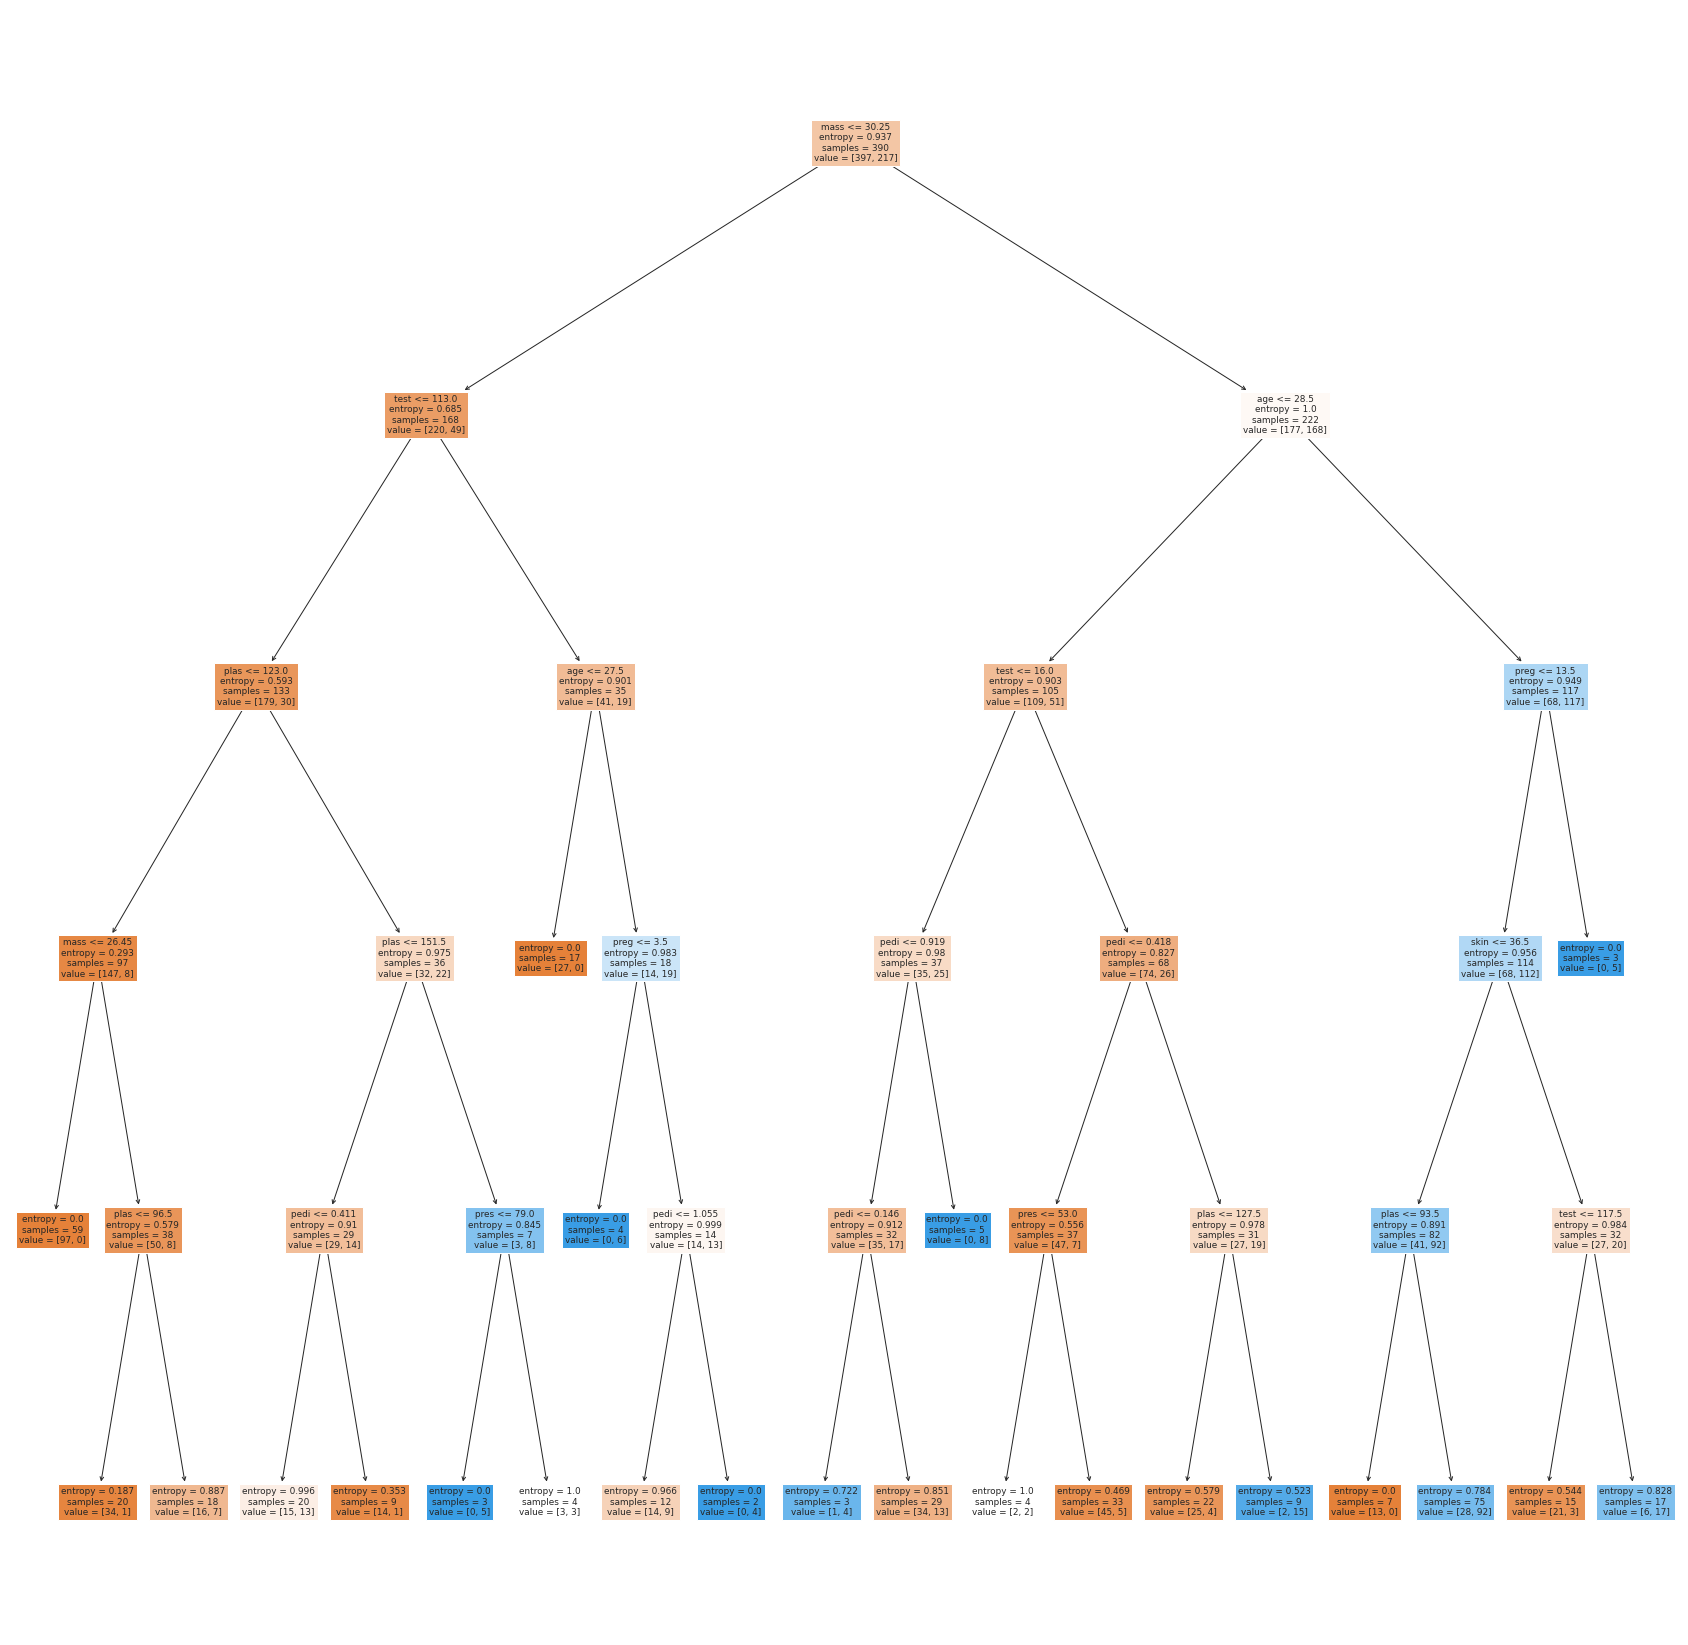

In [224]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(30, 30))

# Obtener un árbol aleatorio del Random Forest
tree_index = 0  # Índice del árbol deseado
Tree = best_model_diabetes.estimators_[tree_index]

# Visualizar el árbol utilizando plot_tree
tree.plot_tree(Tree, feature_names=X_train_diabetes.columns, filled=True)
plt.show()

# Proyecto práctico: random forest

En este proyecto, utilizaremos el modelo Random Forest y reutilizaremos el conjunto de datos "car evaluation".

In [255]:
X_car

,price,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,2,2,1,1,1
2,2,2,3,1,1,1
3,2,2,4,2,2,2
4,3,3,3,2,1,2
...,...,...,...,...,...,...
255,2,3,3,1,1,2
256,2,3,2,2,3,2
257,2,3,2,2,1,2
258,2,3,2,1,3,2


In [256]:
y_car

0        acc
1        acc
2        acc
3        acc
4        acc
       ...  
255    vgood
256    vgood
257    vgood
258    vgood
259    vgood
Name: Class, Length: 260, dtype: object

In [257]:
X_train_car,X_test_car,y_train_car,y_test_car = train_test_split(X_car,y_car, random_state=42)

## Entrenamiento del modelo

In [288]:
rfc_car = RandomForestClassifier(n_estimators=5,random_state=42)

In [289]:
rfc_car.fit(X_train_car,y_train_car)

RandomForestClassifier(n_estimators=5, random_state=42)

In [290]:
y_pred_test_car = rfc_car.predict(X_test_car)
y_pred_train_car = rfc_car.predict(X_train_car)

### Evaluacion del modelo

In [291]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [292]:
print(accuracy_score(y_train_car,y_pred_train_car))
print(accuracy_score(y_test_car,y_pred_test_car))

0.9846153846153847
0.9076923076923077


In [293]:
print(classification_report(y_test_car,y_pred_test_car))

              precision    recall  f1-score   support

         acc       0.86      0.75      0.80        16
        good       0.85      1.00      0.92        17
       unacc       0.93      0.87      0.90        15
       vgood       1.00      1.00      1.00        17

    accuracy                           0.91        65
   macro avg       0.91      0.90      0.90        65
weighted avg       0.91      0.91      0.91        65



### Feature importances

/home/mazzaroli/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


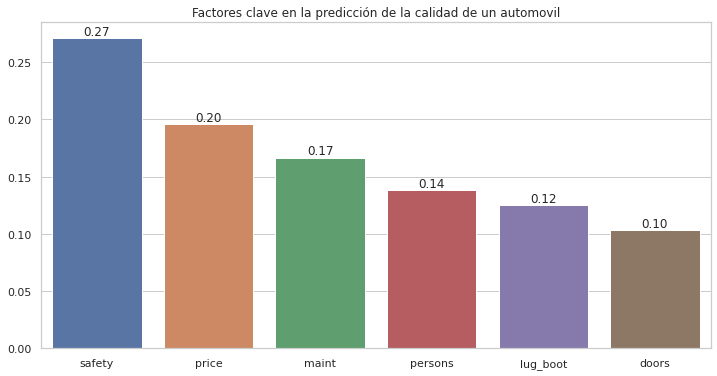

,0
safety,0.271247
price,0.196142
maint,0.166684
persons,0.137885
lug_boot,0.124887
doors,0.103154


In [294]:
feature_scores_car = pd.DataFrame(pd.Series(rfc_car.feature_importances_, index=X_train_car.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_car)

for index, value in enumerate(feature_scores_car.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la calidad de un automovil")
plt.show()
pd.DataFrame(feature_scores_car).T

Un análisis de las importancias de las características revela que las características más influyentes para la evaluación del modelo de coches son:

- **safety:** Con una importancia de 0.271247, se destaca como la característica más importante. Esto indica que la seguridad del vehículo tiene un impacto significativo en la evaluación.

- **price:** El precio del coche es la segunda característica más relevante, con una importancia de 0.196142. Esto sugiere que el precio juega un papel crucial en la evaluación de los vehículos.

- **maint:** El costo de mantenimiento se posiciona como la tercera característica más importante, con una importancia de 0.166684. Esto indica que el costo de mantenimiento también contribuye significativamente a la evaluación de los coches.

- **persons:** La capacidad de pasajeros es la cuarta característica más importante, con una importancia de 0.137885. Esto sugiere que la cantidad de personas que el coche puede acomodar también es un factor relevante en la evaluación.

- **lug_boot:** El tamaño del maletero tiene una importancia de 0.124887. Esto indica que la capacidad de almacenamiento también contribuye a la evaluación de los vehículos.

- **doors:** El número de puertas se posiciona como la sexta característica más importante, con una importancia de 0.103154. Esto sugiere que la cantidad de puertas también puede afectar la evaluación de los coches.

Estos resultados resaltan la importancia de características clave como la **seguridad, el precio, el costo de mantenimiento**.

En cuanto a las características que podrían considerarse menos importantes estan **la capacidad de pasajeros, el tamaño del maletero y el número de puertas**.

Estas características tienen importancias relativamente más bajas en comparación con las tres primeras mencionadas. Sin embargo, aún contribuyen al proceso de evaluación de los coches y pueden proporcionar información adicional.